# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256,256),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256,256),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()

#First Layer
model.add(Conv2D(filters=32, kernel_size=6,padding='same', input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#Second Layer
model.add(Conv2D(filters=64, kernel_size=6, activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#Third Layer
model.add(Conv2D(filters=128, kernel_size=6, activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(Dropout(0.25))
model.add(BatchNormalization())
#Fourth Layer
model.add(Conv2D(filters=128, kernel_size=6,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(Dropout(0.25))


#Last Layer
#model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      3488      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 64)        256       
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch24.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=200,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=100,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
200/200 [==============================] - 160s 798ms/step - loss: 5.5784 - acc: 0.0073 - val_loss: 9.4740 - val_acc: 0.0069

Epoch 00001: val_loss improved from inf to 9.47401, saving model to Saved_Models/weights.best.from_scratch24.hdf5
Epoch 2/50
200/200 [==============================] - 159s 795ms/step - loss: 5.3056 - acc: 0.0164 - val_loss: 5.8452 - val_acc: 0.0123

Epoch 00002: val_loss improved from 9.47401 to 5.84518, saving model to Saved_Models/weights.best.from_scratch24.hdf5
Epoch 3/50
200/200 [==============================] - 160s 801ms/step - loss: 5.2181 - acc: 0.0198 - val_loss: 5.7266 - val_acc: 0.0095

Epoch 00003: val_loss improved from 5.84518 to 5.72661, saving model to Saved_Models/weights.best.from_scratch24.hdf5
Epoch 4/50
200/200 [==============================] - 155s 775ms/step - loss: 5.1257 - acc: 0.0289 - val_loss: 5.3715 - val_acc: 0.0192

Epoch 00004: val_loss improved from 5.72661 to 5.37150

200/200 [==============================] - 153s 766ms/step - loss: 3.9589 - acc: 0.1345 - val_loss: 4.8336 - val_acc: 0.0646

Epoch 00037: val_loss did not improve from 4.71554
Epoch 38/50
200/200 [==============================] - 154s 771ms/step - loss: 3.9592 - acc: 0.1320 - val_loss: 4.8389 - val_acc: 0.0698

Epoch 00038: val_loss did not improve from 4.71554
Epoch 39/50
200/200 [==============================] - 154s 769ms/step - loss: 3.9197 - acc: 0.1431 - val_loss: 4.9467 - val_acc: 0.0601

Epoch 00039: val_loss did not improve from 4.71554
Epoch 40/50
200/200 [==============================] - 153s 767ms/step - loss: 3.8781 - acc: 0.1438 - val_loss: 4.9395 - val_acc: 0.0642

Epoch 00040: val_loss did not improve from 4.71554
Epoch 41/50
200/200 [==============================] - 154s 768ms/step - loss: 3.8628 - acc: 0.1439 - val_loss: 5.0285 - val_acc: 0.0525

Epoch 00041: val_loss did not improve from 4.71554
Epoch 42/50
200/200 [==============================] - 154s 769ms/s

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,9.474014,0.006918,5.575697,0.007376
1,1,5.845176,0.012264,5.305287,0.016478
2,2,5.726607,0.009494,5.218990,0.019931
3,3,5.371497,0.019182,5.123550,0.029033
4,4,5.304481,0.013522,5.079221,0.022128
5,5,5.201499,0.021203,5.026132,0.032172
6,6,5.013797,0.034591,4.963781,0.029033
7,7,5.066800,0.033333,4.922050,0.033271
8,8,5.147023,0.027532,4.859365,0.042059
9,9,4.948656,0.037736,4.805068,0.048493


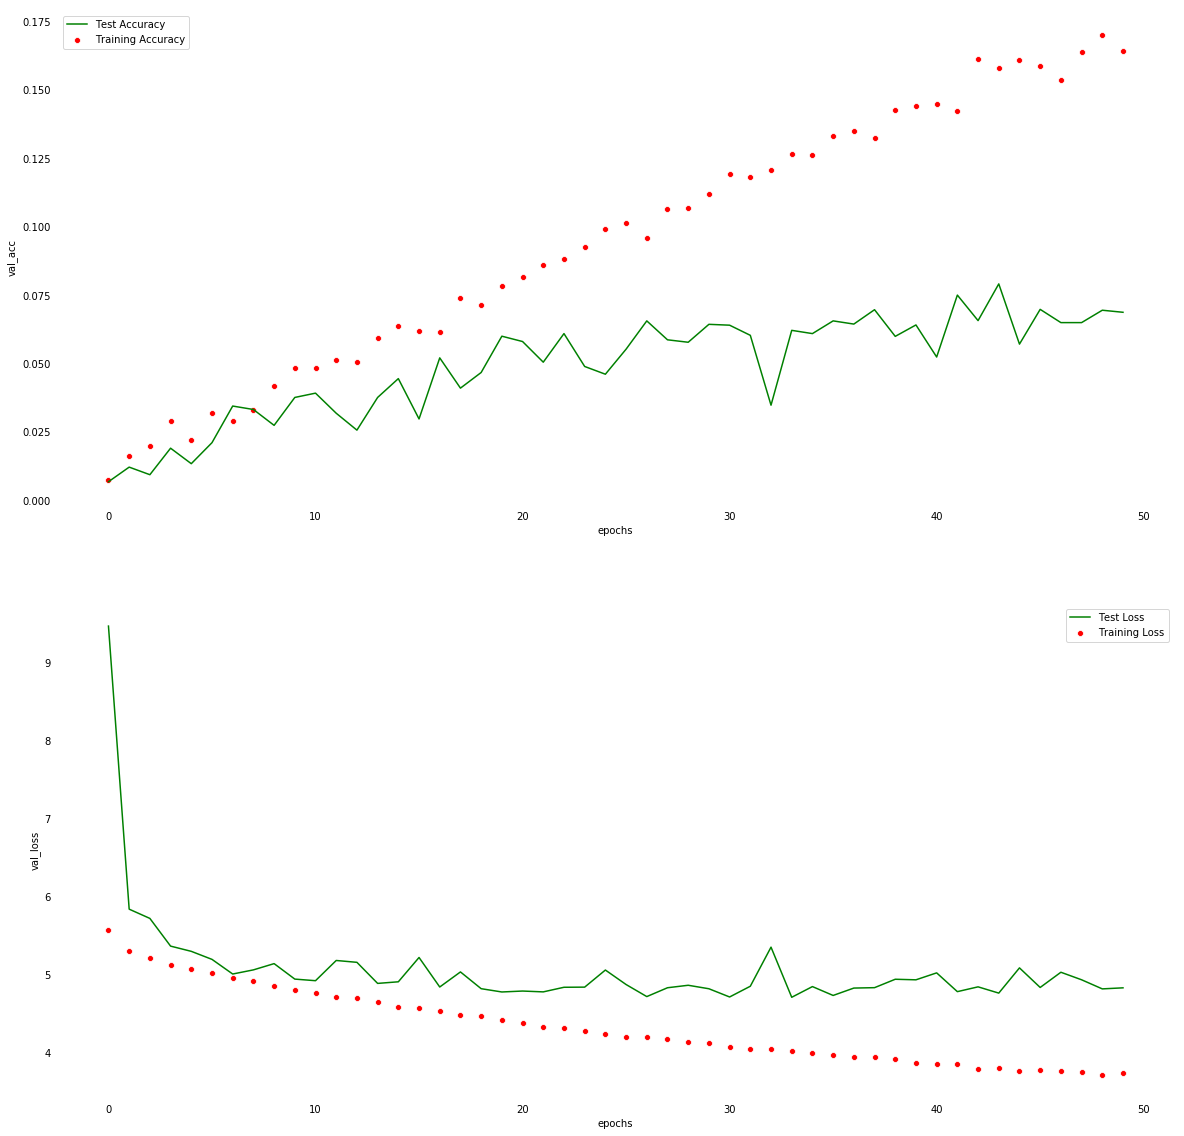

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters